Image Shape:  (512, 512, 3)
262144


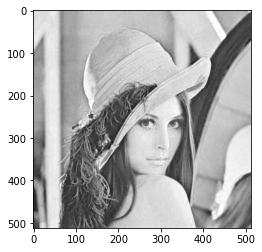

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = plt.imread('./Images/popular_image.jpg')

# View image information & image
print("Image Shape: ", image.shape)
plt.imshow(image)

# Divide images
red = image[:, :, 0]
green = image[:, :, 1]
blue = image[:, :, 2]
plt.imshow(red, cmap="gray")

### Image Compression Algo (splt2)

In [74]:
import math

# Image algorithms
def temporal_sptl2(D, c):
    const=5
    row=len(D)
    col=len(D[0])
    
    pred1=[0]*(row+1)
    pred1[0] = [const]*(col+1)
    pred11=[]

    if(c==1):
        for i in range(1,row+1):
            pred1[i] = [const]
            pred11.append([])
            for j in range(1,col+1):
                pred1[i].append(D[i-1][j-1])

                pred11[i-1].append(float(D[i-1][j-1]-pred1[i-1][j]))
    
    elif(c==2):
        for i in range(1,row+1):
            pred1[i] = [const]
            pred11.append([])
            for j in range(1,col+1):
                pred1[i].append(D[i-1][j-1])
                pred11[i-1].append(float(D[i-1][j-1]-pred1[i-1][j-1]))
     
    elif(c==3):
        for i in range(1,row+1):
            pred1[i] = [const]
            pred11.append([])
            for j in range(1,col+1):
                pred1[i].append(D[i-1][j-1])
                pred11[i-1].append(float(D[i-1][j-1]-pred1[i][j-1]))
                
    elif(c==4):
        for i in range(1,row+1):
            pred1[i] = [const]
            pred11.append([])
            for j in range(1,col+1):
                pred1[i].append(D[i-1][j-1])
                pred11[i-1].append(float(D[i-1][j-1] - (0.5*(pred1[i][j-1]+pred1[i-1][j]))))
        
    elif(c==5):
        for i in range(1,row+1):
            pred1[i] = [const]
            pred11.append([])
            for j in range(1,col+1):
                pred1[i].append(D[i-1][j-1])
                pred11[i-1].append(float(D[i-1][j-1]-pred1[i][j-1]+pred1[i-1][j]-pred1[i-1][j-1]))
        
    elif(c==6):
        for i in range(1,row+1):
            pred1[i] = [const]
            pred11.append([])
            for j in range(1,col+1):
                pred1[i].append(D[i-1][j-1])
                pred11[i-1].append(float(D[i-1][j-1]-math.floor(pred1[i][j-1]+((pred1[i-1][j]-pred1[i-1][j-1])*0.5))))
        
    elif(c==7):
        for i in range(1,row+1):
            pred1[i] = [const]
            pred11.append([])
            for j in range(1,col+1):
                pred1[i].append(D[i-1][j-1])
                pred11[i-1].append(float(D[i-1][j-1]-math.floor(pred1[i-1][j]+((pred1[i][j-1]-pred1[i-1][j-1])*0.5))))
        
    
    return pred11



compressed_image_1 = temporal_sptl2(red, 1)
compressed_image_2 = temporal_sptl2(red, 2)
compressed_image_3 = temporal_sptl2(red, 3)
compressed_image_4 = temporal_sptl2(red, 4)
compressed_image_5 = temporal_sptl2(red, 5)
compressed_image_6 = temporal_sptl2(red, 6)
compressed_image_7 = temporal_sptl2(red, 7)


<ipython-input-74-1ac6bf6a880d>:20: RuntimeWarning: overflow encountered in ubyte_scalars
  pred11[i-1].append(float(D[i-1][j-1]-pred1[i-1][j]))
<ipython-input-74-1ac6bf6a880d>:28: RuntimeWarning: overflow encountered in ubyte_scalars
  pred11[i-1].append(float(D[i-1][j-1]-pred1[i-1][j-1]))
<ipython-input-74-1ac6bf6a880d>:36: RuntimeWarning: overflow encountered in ubyte_scalars
  pred11[i-1].append(float(D[i-1][j-1]-pred1[i][j-1]))
<ipython-input-74-1ac6bf6a880d>:44: RuntimeWarning: overflow encountered in ubyte_scalars
  pred11[i-1].append(float(D[i-1][j-1] - (0.5*(pred1[i][j-1]+pred1[i-1][j]))))
<ipython-input-74-1ac6bf6a880d>:52: RuntimeWarning: overflow encountered in ubyte_scalars
  pred11[i-1].append(float(D[i-1][j-1]-pred1[i][j-1]+pred1[i-1][j]-pred1[i-1][j-1]))
<ipython-input-74-1ac6bf6a880d>:60: RuntimeWarning: overflow encountered in ubyte_scalars
  pred11[i-1].append(float(D[i-1][j-1]-math.floor(pred1[i][j-1]+((pred1[i-1][j]-pred1[i-1][j-1])*0.5))))
<ipython-input-74-1ac6bf

### Apply Entropy and compression function to determine entropy

In [106]:
#Define Entropy Function
def bitrate(img):
    his = np.histogramdd(np.ravel(img), bins = 256)[0]/(len(img)*len(img[0]))
    his = list(filter(lambda p: p > 0, np.ravel(his)))
    entropy = -np.sum(np.multiply(his, np.log2(his)))
    
    return entropy;

# Determine bit rate for input image
bitret_of_inuput_image = bitrate(red)

# Determine bit rate for compressed image
bitret_of_compressed_image_1 = bitrate(compressed_image_1)
bitret_of_compressed_image_2 = bitrate(compressed_image_2)
bitret_of_compressed_image_3 = bitrate(compressed_image_3)
bitret_of_compressed_image_4 = bitrate(compressed_image_4)
bitret_of_compressed_image_5 = bitrate(compressed_image_5)
bitret_of_compressed_image_6 = bitrate(compressed_image_6)
bitret_of_compressed_image_7 = bitrate(compressed_image_7)


print("-------------------------------------------")
print("|   IMAGE      |            ENTROPY         |")
print("|--------------|----------------------------|")
print("|   original   |      ", bitret_of_inuput_image, "  |")
print("|--------------|----------------------------|")
print("|     A        |      ", bitret_of_compressed_image_1, "   |")
print("|--------------|----------------------------|")
print("|     B        |      ", bitret_of_compressed_image_2, "  |")
print("|--------------|----------------------------|")
print("|     C        |      ", bitret_of_compressed_image_3, "   |")
print("|--------------|----------------------------|")
print("|   (A+B)/2    |      ", bitret_of_compressed_image_4, "   |")
print("|--------------|----------------------------|")
print("|   (A+B-C)    |      ", bitret_of_compressed_image_5, "  |")
print("|--------------|----------------------------|")
print("|  A+(B-C)/2   |      ", bitret_of_compressed_image_6, "   |")
print("|--------------|----------------------------|")
print("|  B+(A-C)/2   |      ", bitret_of_compressed_image_7, "  |")
print("--------------------------------------------")

-------------------------------------------
|   IMAGE      |            ENTROPY         |
|--------------|----------------------------|
|   original   |       7.2847737791467075   |
|--------------|----------------------------|
|     A        |       4.812443081468626    |
|--------------|----------------------------|
|     B        |       5.4676506588923655   |
|--------------|----------------------------|
|     C        |       5.210382716985018    |
|--------------|----------------------------|
|   (A+B)/2    |       5.299411075209102    |
|--------------|----------------------------|
|   (A+B-C)    |       5.1465469203035665   |
|--------------|----------------------------|
|  A+(B-C)/2   |       4.842469659218256    |
|--------------|----------------------------|
|  B+(A-C)/2   |       4.7756280308996475   |
--------------------------------------------
